In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

In [2]:
!pip install xgboost

In [3]:
from xgboost import XGBRegressor

In [4]:
# Predicting house prices using the California Housing Dataset. 'Performance' means both speed and accuracy.

from sklearn.datasets import fetch_california_housing

In [5]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [6]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exercise 1: How many observations and features does the dataset have?

In [7]:
N_observations, N_features = X.shape
print("Number of observations :", N_observations)
print("Number of features:", N_features)

Number of observations : 20640
Number of features: 8


### Initialize models

In [8]:
n_estimators=100

rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

### Fit models

In [9]:
# Measure training time for Random Forest
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf

# Measure training time for XGBoost
start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

#### Exercise 2. Use the fitted models to make predictions on the test set.

In [10]:
# Measure prediction time for Random Forest
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

#### Exercise 3: Calulate the MSE and R^2 values for both models

In [11]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

#### Exercise 4: Print the MSE and R^2 values for both models

In [12]:
print(f"Random Forest: MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}")
print(f"XGBoost: MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}")

Random Forest: MSE = 0.2554, R^2 = 0.8051
XGBoost: MSE = 0.2226, R^2 = 0.8301


#### Exercise 5: Print the timings for each model

In [13]:
print(f"Random Forest: Training Time = {rf_train_time:.3f} seconds, Testing Time = {rf_pred_time:.3f} seconds")
print(f"XGBoost: Training Time = {xgb_train_time:.3f} seconds, Testing Time = {xgb_pred_time:.3f} seconds")

Random Forest: Training Time = 40.735 seconds, Testing Time = 0.289 seconds
XGBoost: Training Time = 0.917 seconds, Testing Time = 0.018 seconds


#### Exercise 6. Calculate the standard deviation of the test data

In [15]:
std_y = np.std(y_test)
std_y

np.float64(1.1447309632576992)

### Visualize the results

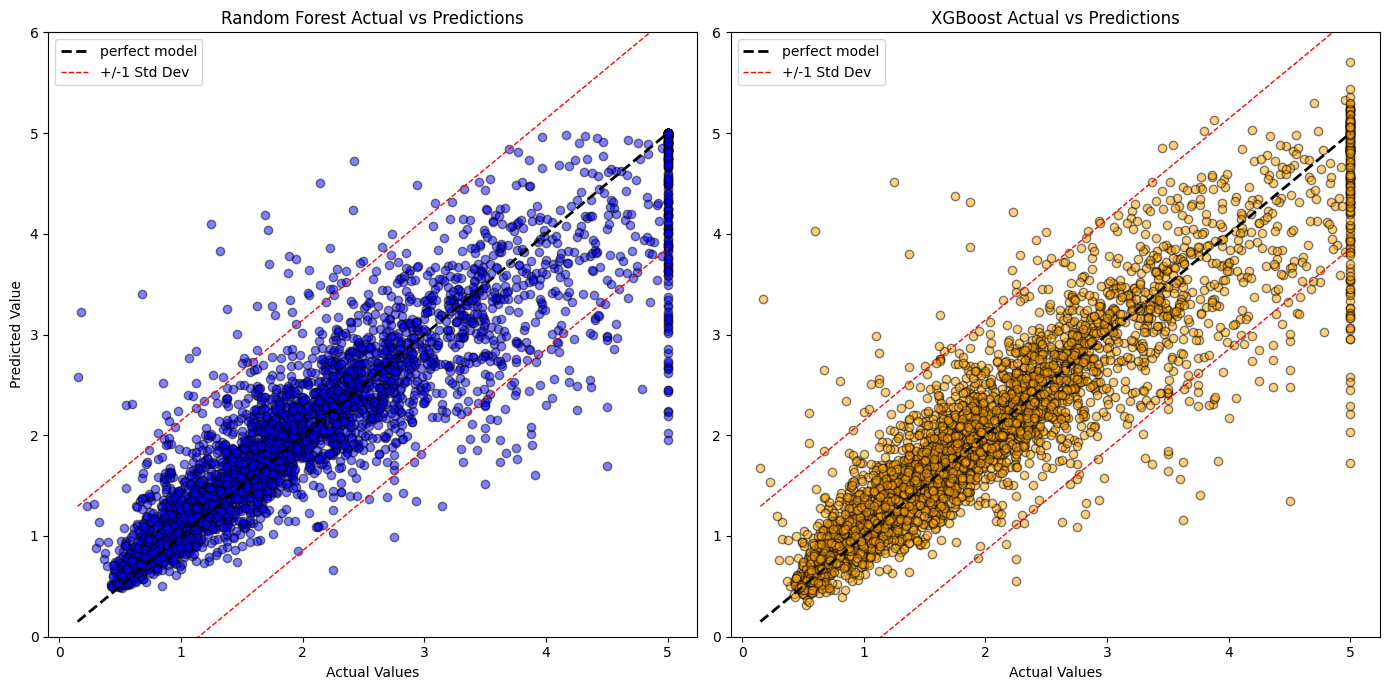

In [16]:
plt.figure(figsize=(14, 7))

# Random Forest plot
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue", ec="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2, label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], "r--", lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], "r--", lw=1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Value")
plt.title("Random Forest Actual vs Predictions")
plt.ylim(0,6)
plt.legend()

# XGBoost plot
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange", ec="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2, label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], "r--", lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], "r--", lw=1)
plt.xlabel("Actual Values")
plt.title("XGBoost Actual vs Predictions")
plt.ylim(0,6)
plt.tight_layout()
plt.legend()
plt.show()